In [58]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Cross-Validation and Bias-Variance decomposition
## Cross-Validation
Implementing 4-fold cross-validation below:

In [59]:
from helpers import load_data

# load dataset
x, y = load_data()

In [60]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)

In [61]:
arr = build_k_indices(np.arange(20), 6, 1)
arr

array([[ 3, 16,  6],
       [10,  2, 14],
       [ 4, 17,  7],
       [ 1, 13,  0],
       [19, 18,  9],
       [15,  8, 12]])

In [62]:
np.concatenate((arr[:3], arr[4:]))

array([[ 3, 16,  6],
       [10,  2, 14],
       [ 4, 17,  7],
       [19, 18,  9],
       [15,  8, 12]])

In [63]:
range(0,4)

[0, 1, 2, 3]

In [68]:
from costs import *
from ridge_regression import ridge_regression
from build_polynomial import build_poly

def cross_validation(y, x, k_indices, k, lambda_, degree):
    """return the loss of ridge regression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # get k'th subgroup in test, others in train: TODO
    # ***************************************************
    indices_test = k_indices[k]
    indices_train = (np.concatenate((k_indices[:k], k_indices[(k+1):]))).reshape(-1)
    x_test = x[indices_test]
    x_training = x[indices_train]
    y_test = y[indices_test]
    y_training = y[indices_train]
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form data with polynomial degree: TODO
    # ***************************************************
    x_test_p = build_poly(x_test, degree)
    x_training_p = build_poly(x_training, degree)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression: TODO
    # ***************************************************
    w = ridge_regression(y_training, x_training_p, lambda_)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate the loss for train and test data: TODO
    # ***************************************************
    rmse_tr = compute_rmse(y_training, x_training_p, w)
    rmse_ts = compute_rmse(y_test, x_test_p, w)
    return rmse_tr, rmse_ts

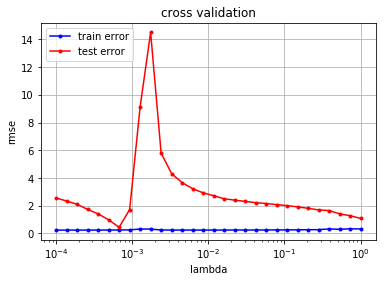

In [89]:
from plots import cross_validation_visualization

def cross_validation_demo():
    seed = 1
    degree = 17
    k_fold = 4
    lambdas = np.logspace(-4, 0, 30)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_ts = []
    # ***************************************************
    # INSERT YOUR CODE HERE
    # cross validation: TODO
    # ***************************************************    
    for l in lambdas:
        rmse_tr_mean = 0
        rmse_ts_mean = 0
        for k in range(0,4):
            rmse_tr_temp, rmse_ts_temp = cross_validation(y, x, k_indices, k, l, degree)
            rmse_tr_mean = rmse_tr_mean + rmse_tr_temp
            rmse_ts_mean = rmse_ts_mean + rmse_ts_temp
        rmse_tr.append(rmse_tr_mean / k_fold)
        rmse_ts.append(rmse_ts_mean / k_fold)
        
    cross_validation_visualization(lambdas, rmse_tr, rmse_ts)

cross_validation_demo()

## Bias-Variance Decomposition
Visualize bias-variance trade-off by implementing the function `bias_variance_demo()` below:

In [ ]:
from least_squares import least_squares
from split_data import split_data
from plots import bias_variance_decomposition_visualization

def bias_variance_demo():
    """The entry."""
    # define parameters
    seeds = range(100)
    num_data = 10000
    ratio_train = 0.005
    degrees = range(1, 10)
    
    # define list to store the variable
    rmse_tr = np.empty((len(seeds), len(degrees)))
    rmse_te = np.empty((len(seeds), len(degrees)))
    
    for index_seed, seed in enumerate(seeds):
        np.random.seed(seed)
        x = np.linspace(0.1, 2 * np.pi, num_data)
        y = np.sin(x) + 0.3 * np.random.randn(num_data).T
        # ***************************************************
        # INSERT YOUR CODE HERE
        # split data with a specific seed: TODO
        # ***************************************************
        
        # ***************************************************
        # INSERT YOUR CODE HERE
        # bias_variance_decomposition: TODO
        # ***************************************************
        raise NotImplementedError

    bias_variance_decomposition_visualization(degrees, rmse_tr, rmse_te)

bias_variance_demo()